## Функции Активации

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import torch

In [0]:
import numpy as np

## MLP

## Данные

In [0]:
import torchvision as tv

In [0]:
import time

In [0]:
BATCH_SIZE=256

In [7]:
train_dataset = tv.datasets.MNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.MNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

0it [00:00, ?it/s]

9920512it [00:03, 3114871.48it/s]                            


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 49682.38it/s]                           
0it [00:00, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


1654784it [00:02, 825289.08it/s]                             
0it [00:00, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


8192it [00:00, 18782.55it/s]            

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


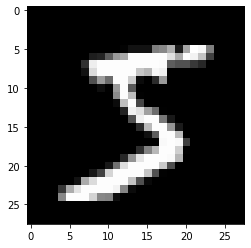

In [8]:
plt.imshow(train_dataset[0][0].numpy().reshape(28,28), cmap='gray')

## Модель

In [0]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
)

In [0]:
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.SGD(model.parameters(), lr=0.5)
num_epochs = 10

In [11]:
for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, train_loss: 0.43806211437950743, train_acc: 0.8718666666666667, test_loss: 0.2446914380416274, test_acc: 0.9246
ep: 1, train_loss: 0.1899401124804578, train_acc: 0.9447666666666666, test_loss: 0.18029865566641093, test_acc: 0.9434
ep: 2, train_loss: 0.13776352656807037, train_acc: 0.9607166666666667, test_loss: 0.14155601998791098, test_acc: 0.9566
ep: 3, train_loss: 0.108440090442433, train_acc: 0.9691833333333333, test_loss: 0.1189381544245407, test_acc: 0.9634
ep: 4, train_loss: 0.08936783809294092, train_acc: 0.97505, test_loss: 0.1025958024780266, test_acc: 0.9682
ep: 5, train_loss: 0.07575275483442113, train_acc: 0.9790333333333333, test_loss: 0.09272746562492103, test_acc: 0.9708
ep: 6, train_loss: 0.06530946366132256, train_acc: 0.9821333333333333, test_loss: 0.08560335382353515, test_acc: 0.9738
ep: 7, train_loss: 0.057037416942655406, train_acc: 0.9844666666666667, test_loss: 0.08168934433488176, test_acc: 0.9746
ep: 8, train_loss: 0.05032605525066561, train_acc: 0.986

## Практика - попробуйте заменить SGD на Adam и RMSProp. Увеличиться ли скорость сходимости?

In [12]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
)
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model.parameters(), lr=0.01)

for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, train_loss: 0.25028374117422614, train_acc: 0.9248333333333333, test_loss: 0.14524812470190226, test_acc: 0.9539
ep: 1, train_loss: 0.10566356325165388, train_acc: 0.96785, test_loss: 0.09756288226344623, test_acc: 0.9691
ep: 2, train_loss: 0.07091532532284234, train_acc: 0.9780166666666666, test_loss: 0.13142999320989474, test_acc: 0.9626
ep: 3, train_loss: 0.0618626899462431, train_acc: 0.9799, test_loss: 0.13872262883305667, test_acc: 0.9642
ep: 4, train_loss: 0.052518137221402944, train_acc: 0.9831166666666666, test_loss: 0.1162714437537943, test_acc: 0.97
ep: 5, train_loss: 0.04739823080698385, train_acc: 0.9845166666666667, test_loss: 0.12663812247265013, test_acc: 0.9704
ep: 6, train_loss: 0.04352814682581006, train_acc: 0.9860666666666666, test_loss: 0.13051886866844598, test_acc: 0.9714
ep: 7, train_loss: 0.0395371701285996, train_acc: 0.9880166666666667, test_loss: 0.1652839066778597, test_acc: 0.9659
ep: 8, train_loss: 0.04211744891375581, train_acc: 0.986833333333333

In [15]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
)
trainer = torch.optim.RMSprop(model.parameters(), lr=0.01)

for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, train_loss: 0.8479294154238194, train_acc: 0.8963166666666667, test_loss: 0.4534246899187565, test_acc: 0.8762
ep: 1, train_loss: 0.1529344073873251, train_acc: 0.9561, test_loss: 0.4551741316914558, test_acc: 0.8904
ep: 2, train_loss: 0.10873233966846416, train_acc: 0.9673166666666667, test_loss: 0.6513886108994484, test_acc: 0.8819
ep: 3, train_loss: 0.0875918420309082, train_acc: 0.9736833333333333, test_loss: 0.11950736017897726, test_acc: 0.9661
ep: 4, train_loss: 0.0677890812552118, train_acc: 0.97875, test_loss: 0.14801583015359937, test_acc: 0.9616
ep: 5, train_loss: 0.05612889126914137, train_acc: 0.9826666666666667, test_loss: 0.1873030059505254, test_acc: 0.9533
ep: 6, train_loss: 0.04825423864172177, train_acc: 0.9846833333333334, test_loss: 0.17157349165063351, test_acc: 0.9624
ep: 7, train_loss: 0.04109333714648606, train_acc: 0.9868166666666667, test_loss: 0.14383858686778694, test_acc: 0.9665
ep: 8, train_loss: 0.03831634336706013, train_acc: 0.9882166666666666, 

## Практика - попробуйте сделать больше слоев в сети  - увеличиться ли качество?

In [16]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 10)
)
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model.parameters(), lr=0.005)

for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, train_loss: 0.30942338667809965, train_acc: 0.9070333333333334, test_loss: 0.16914815615164117, test_acc: 0.9438
ep: 1, train_loss: 0.11299491632888292, train_acc: 0.96625, test_loss: 0.11641185453627259, test_acc: 0.9638
ep: 2, train_loss: 0.07363993383230681, train_acc: 0.97715, test_loss: 0.09968600271095056, test_acc: 0.9677
ep: 3, train_loss: 0.053048910838650896, train_acc: 0.9837333333333333, test_loss: 0.1010510757618249, test_acc: 0.9701
ep: 4, train_loss: 0.045486284489248026, train_acc: 0.9856333333333334, test_loss: 0.1108421052718768, test_acc: 0.969
ep: 5, train_loss: 0.04181569814483853, train_acc: 0.9857, test_loss: 0.09996080518449162, test_acc: 0.9728
ep: 6, train_loss: 0.03682065683991668, train_acc: 0.9876166666666667, test_loss: 0.08869844721257322, test_acc: 0.9753
ep: 7, train_loss: 0.031404564066968385, train_acc: 0.9891, test_loss: 0.09583330173682043, test_acc: 0.9746
ep: 8, train_loss: 0.02652743095234829, train_acc: 0.9912666666666666, test_loss: 0.10

## Практика - попробуйте добавить регуляризацию, dropout и/или batchnorm-слои. Увеличится ли качество?

In [17]:
model = torch.nn.Sequential(
    torch.nn.Dropout(p=0.1),
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 64),
    torch.nn.ReLU(),
    torch.nn.Dropout(p=0.3),
    torch.nn.Linear(64, 10)
)
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model.parameters(), lr=0.005)

for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, train_loss: 0.3579540642969152, train_acc: 0.8937333333333334, test_loss: 0.17939673298969866, test_acc: 0.9447
ep: 1, train_loss: 0.1450917762406963, train_acc: 0.9575333333333333, test_loss: 0.1269842053297907, test_acc: 0.9608
ep: 2, train_loss: 0.10702699663394943, train_acc: 0.9682666666666667, test_loss: 0.13167636535363272, test_acc: 0.9622
ep: 3, train_loss: 0.08938399732628084, train_acc: 0.9727666666666667, test_loss: 0.11100658595241839, test_acc: 0.9681
ep: 4, train_loss: 0.07860253241428353, train_acc: 0.9756166666666667, test_loss: 0.10561397053970722, test_acc: 0.9704
ep: 5, train_loss: 0.06809952283634785, train_acc: 0.9786, test_loss: 0.10699371444206918, test_acc: 0.9723
ep: 6, train_loss: 0.05914921403486044, train_acc: 0.9816666666666667, test_loss: 0.1226057239662623, test_acc: 0.9667
ep: 7, train_loss: 0.05542128389265309, train_acc: 0.9823666666666667, test_loss: 0.12663102153892397, test_acc: 0.9667
ep: 8, train_loss: 0.05355906089609291, train_acc: 0.983

In [18]:
model = torch.nn.Sequential(
    #torch.nn.Dropout(p=0.1),
    torch.nn.Flatten(),
    torch.nn.BatchNorm1d(784),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(256),
    torch.nn.Linear(256, 64),
    torch.nn.ReLU(),
    #torch.nn.Dropout(p=0.3),
    torch.nn.BatchNorm1d(64),
    torch.nn.Linear(64, 10)
)
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model.parameters(), lr=0.005)

for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, train_loss: 0.21633996729283256, train_acc: 0.9364, test_loss: 0.12494889532681555, test_acc: 0.9601
ep: 1, train_loss: 0.08471490665675795, train_acc: 0.9741833333333333, test_loss: 0.10266675311140716, test_acc: 0.9687
ep: 2, train_loss: 0.048913608308128534, train_acc: 0.9845666666666667, test_loss: 0.11336418355349451, test_acc: 0.9677
ep: 3, train_loss: 0.03248597920371933, train_acc: 0.9899166666666667, test_loss: 0.12084827182261507, test_acc: 0.9686
ep: 4, train_loss: 0.028793690075225968, train_acc: 0.9906833333333334, test_loss: 0.12104182565817609, test_acc: 0.9696
ep: 5, train_loss: 0.022199561977647542, train_acc: 0.9922166666666666, test_loss: 0.12448932444676757, test_acc: 0.9721
ep: 6, train_loss: 0.01972281233100419, train_acc: 0.9929833333333333, test_loss: 0.11615704157447908, test_acc: 0.9734
ep: 7, train_loss: 0.012182401520190166, train_acc: 0.99615, test_loss: 0.12037885885392825, test_acc: 0.9757
ep: 8, train_loss: 0.010989860560437863, train_acc: 0.99666

### Домашнее задание

In [0]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import torchvision as tv
import time
%matplotlib inline

In [0]:
BATCH_SIZE=256

In [3]:
train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

0it [00:00, ?it/s]

26427392it [00:04, 5834265.81it/s]                              


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 40409.59it/s]                           
0it [00:00, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw


4423680it [00:02, 1699516.01it/s]                            
0it [00:00, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw


8192it [00:00, 15310.09it/s]            

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw
Processing...
Done!


In [4]:
'''model = torch.nn.Sequential(
    #torch.nn.Dropout(p=0.1),
    torch.nn.Flatten(),
    torch.nn.BatchNorm1d(784),
    torch.nn.Linear(784, 64),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(64),
    torch.nn.Linear(64, 128),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(128),
    torch.nn.Linear(128, 128),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(128),
    torch.nn.Linear(128, 64),
    torch.nn.ReLU(),
    #torch.nn.Dropout(p=0.3),
    torch.nn.BatchNorm1d(64),
    torch.nn.Linear(64, 10)
)'''
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Dropout(p=0.15),
    #torch.nn.BatchNorm1d(784),
    torch.nn.Linear(784, 64),
    torch.nn.ReLU(),
    #torch.nn.BatchNorm1d(256),
    #torch.nn.Linear(256, 128),
    #torch.nn.ReLU(),
    #torch.nn.BatchNorm1d(128),
    #torch.nn.Linear(128, 64),
    #torch.nn.ReLU(),
    #torch.nn.Dropout(p=0.3),
    #torch.nn.BatchNorm1d(64),
    torch.nn.Linear(64, 10)
)
print(model)
loss = torch.nn.CrossEntropyLoss()

LEARNING_RATE = 0.005
num_glob_circle = 20
num_epochs = 50

l_prev_loss = [100,100,100,100]
l_lr = LEARNING_RATE
#trainer = torch.optim.Adam(model.parameters(), lr=l_lr)
trainer, trainer_name = torch.optim.Adam(model.parameters(), lr=l_lr), 'adam'
for glob_circle in range(num_glob_circle):
  #trainer = torch.optim.Adam(model.parameters(), lr=l_lr)
  #trainer, trainer_name = torch.optim.SGD(model.parameters(), lr=l_lr), 'sgd'

  for ep in range(num_epochs):
      train_iters, train_passed  = 0, 0
      train_loss, train_acc = 0., 0.
      
      for X, y in train:
          trainer.zero_grad()
          y_pred = model(X)
          l = loss(y_pred, y)
          l.backward()
          trainer.step()
          train_loss += l.item()
          train_acc += (y_pred.argmax(dim=1) == y).sum().item()
          train_iters += 1
          train_passed += len(X)
      
      test_iters, test_passed  = 0, 0
      test_loss, test_acc = 0., 0.
      for X, y in test:
          y_pred = model(X)
          l = loss(y_pred, y)
          test_loss += l.item()
          test_acc += (y_pred.argmax(dim=1) == y).sum().item()
          test_iters += 1
          test_passed += len(X)
          
      print("trainer_name: {}, glob_circle: {}, lr: {}, ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
          trainer_name, glob_circle, l_lr, ep, train_loss / train_iters, train_acc / train_passed,
          test_loss / test_iters, test_acc / test_passed)
      )
      if test_loss / test_iters < max(l_prev_loss):
        l_prev_loss.append(test_loss / test_iters)
        del l_prev_loss[0]
        #print(l_prev_loss)
      else:
        if ep != 0:
          l_lr = l_lr / 2
          break
        '''else:
          if trainer_name == 'sgd':
            trainer, trainer_name = torch.optim.Adam(model.parameters(), lr=l_lr), 'adam'
          else:
            trainer, trainer_name = torch.optim.SGD(model.parameters(), lr=l_lr), 'sgd'
        #break'''

Sequential(
  (0): Flatten()
  (1): Dropout(p=0.15, inplace=False)
  (2): Linear(in_features=784, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)
trainer_name: adam, glob_circle: 0, lr: 0.005, ep: 0, train_loss: 0.5816112281160152, train_acc: 0.7955333333333333, test_loss: 0.5049769878387451, test_acc: 0.8148
trainer_name: adam, glob_circle: 0, lr: 0.005, ep: 1, train_loss: 0.4400159423655652, train_acc: 0.84345, test_loss: 0.4487044714391232, test_acc: 0.8372
trainer_name: adam, glob_circle: 0, lr: 0.005, ep: 2, train_loss: 0.4022969107678596, train_acc: 0.8545, test_loss: 0.4424269303679466, test_acc: 0.8453
trainer_name: adam, glob_circle: 0, lr: 0.005, ep: 3, train_loss: 0.37435932387696935, train_acc: 0.8628833333333333, test_loss: 0.41862376146018504, test_acc: 0.8485
trainer_name: adam, glob_circle: 0, lr: 0.005, ep: 4, train_loss: 0.3639631019627794, train_acc: 0.8651666666666666, test_loss: 0.41721331477165224, test_acc: 0.

KeyboardInterrupt: ignored

In [0]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Dropout(p=0.3),
    #torch.nn.BatchNorm1d(784),
    torch.nn.Linear(784, 784*2),
    torch.nn.ReLU(),
    #torch.nn.BatchNorm1d(256),
    torch.nn.Linear(784*2, 784),
    torch.nn.ReLU(),
    torch.nn.Linear(784, 64),
    torch.nn.ReLU(),
    #torch.nn.Dropout(p=0.3),
    #torch.nn.BatchNorm1d(64),
    torch.nn.Linear(64, 10)
)

print(model)
loss = torch.nn.CrossEntropyLoss()
num_epochs = 100

l_lr = 0.00001
trainer = torch.optim.Adam(model.parameters(), lr=l_lr)
#trainer, trainer_name = torch.optim.SGD(model.parameters(), lr=l_lr), 'sgd'

for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

Sequential(
  (0): Flatten()
  (1): Dropout(p=0.3, inplace=False)
  (2): Linear(in_features=784, out_features=1568, bias=True)
  (3): ReLU()
  (4): Linear(in_features=1568, out_features=784, bias=True)
  (5): ReLU()
  (6): Linear(in_features=784, out_features=64, bias=True)
  (7): ReLU()
  (8): Linear(in_features=64, out_features=10, bias=True)
)
ep: 0, train_loss: 2.007032090045036, train_acc: 0.43735, test_loss: 1.4971646994352341, test_acc: 0.6138
ep: 1, train_loss: 1.1166599174763294, train_acc: 0.66105, test_loss: 0.912967962026596, test_acc: 0.6696
ep: 2, train_loss: 0.8151928721590245, train_acc: 0.7052833333333334, test_loss: 0.7762050539255142, test_acc: 0.7208
ep: 3, train_loss: 0.7213461307769126, train_acc: 0.7451666666666666, test_loss: 0.7152278959751129, test_acc: 0.7481
ep: 4, train_loss: 0.6694677223550513, train_acc: 0.7672833333333333, test_loss: 0.6703276425600052, test_acc: 0.7641
ep: 5, train_loss: 0.6304133516676882, train_acc: 0.7810166666666667, test_loss: 0.63

In [17]:
l_lr = 0.001
#trainer = torch.optim.Adam(model.parameters(), lr=l_lr)
trainer = torch.optim.SGD(model.parameters(), lr=l_lr)

for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, train_loss: 0.26618962633912846, train_acc: 0.9020166666666667, test_loss: 0.3850274384021759, test_acc: 0.8717
ep: 1, train_loss: 0.2601424402604669, train_acc: 0.9043, test_loss: 0.38364130407571795, test_acc: 0.8747
ep: 2, train_loss: 0.2597699494937719, train_acc: 0.9052666666666667, test_loss: 0.39676312953233717, test_acc: 0.877
ep: 3, train_loss: 0.2585946951629752, train_acc: 0.9043666666666667, test_loss: 0.39009893834590914, test_acc: 0.871
ep: 4, train_loss: 0.2600662257459204, train_acc: 0.9049833333333334, test_loss: 0.3877578377723694, test_acc: 0.8721
ep: 5, train_loss: 0.2595129057259883, train_acc: 0.905, test_loss: 0.38549071103334426, test_acc: 0.8736
ep: 6, train_loss: 0.2565924741201482, train_acc: 0.9055833333333333, test_loss: 0.38994742184877396, test_acc: 0.8744
ep: 7, train_loss: 0.2544286431649984, train_acc: 0.9065833333333333, test_loss: 0.3868996188044548, test_acc: 0.8725
ep: 8, train_loss: 0.25689120527546283, train_acc: 0.90705, test_loss: 0.3911

In [18]:
num_epochs = 50

l_lr = 0.001
#trainer = torch.optim.Adam(model.parameters(), lr=l_lr)
trainer = torch.optim.SGD(model.parameters(), lr=l_lr, momentum=0.1)

for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, train_loss: 0.2540524264765998, train_acc: 0.9055166666666666, test_loss: 0.38086457550525665, test_acc: 0.8765
ep: 1, train_loss: 0.2501078529630677, train_acc: 0.9063166666666667, test_loss: 0.3734755277633667, test_acc: 0.8766
ep: 2, train_loss: 0.24867442427045208, train_acc: 0.9063833333333333, test_loss: 0.3828242391347885, test_acc: 0.8752
ep: 3, train_loss: 0.25161558629597647, train_acc: 0.90635, test_loss: 0.3845138520002365, test_acc: 0.8733
ep: 4, train_loss: 0.25211743909423634, train_acc: 0.9074, test_loss: 0.3859805315732956, test_acc: 0.8756
ep: 5, train_loss: 0.24676321863622988, train_acc: 0.9068666666666667, test_loss: 0.38657804727554324, test_acc: 0.8741
ep: 6, train_loss: 0.2474490795600212, train_acc: 0.9071166666666667, test_loss: 0.3801821991801262, test_acc: 0.8732
ep: 7, train_loss: 0.24925198456493475, train_acc: 0.9072166666666667, test_loss: 0.3771050006151199, test_acc: 0.8765
ep: 8, train_loss: 0.2489212812003443, train_acc: 0.9074333333333333, te

In [19]:
num_epochs = 50

l_lr = 0.00005
trainer = torch.optim.Adam(model.parameters(), lr=l_lr)

for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, train_loss: 0.2491744129081904, train_acc: 0.9060666666666667, test_loss: 0.3760410353541374, test_acc: 0.8767
ep: 1, train_loss: 0.2466297494405407, train_acc: 0.9081166666666667, test_loss: 0.3634828686714172, test_acc: 0.8771
ep: 2, train_loss: 0.2495763375092361, train_acc: 0.9067166666666666, test_loss: 0.3713590770959854, test_acc: 0.8759
ep: 3, train_loss: 0.24473253915370521, train_acc: 0.9077833333333334, test_loss: 0.37639252841472626, test_acc: 0.8747
ep: 4, train_loss: 0.24424421597840423, train_acc: 0.90885, test_loss: 0.3741656497120857, test_acc: 0.8762
ep: 5, train_loss: 0.24642195161116326, train_acc: 0.9077333333333333, test_loss: 0.3758451610803604, test_acc: 0.8779
ep: 6, train_loss: 0.24604736937809799, train_acc: 0.9077833333333334, test_loss: 0.3768702119588852, test_acc: 0.8746
ep: 7, train_loss: 0.24177607742406554, train_acc: 0.90915, test_loss: 0.3730737090110779, test_acc: 0.8778
ep: 8, train_loss: 0.24376479713088375, train_acc: 0.90835, test_loss: 0

In [0]:
glob_circle: 0, lr: 0.1, ep: 0, train_loss: 0.6065994061054067, train_acc: 0.78185, test_loss: 0.5109195582568645, test_acc: 0.8192
glob_circle: 0, lr: 0.1, ep: 1, train_loss: 0.45688008412401726, train_acc: 0.8389333333333333, test_loss: 0.47057330831885336, test_acc: 0.8353
glob_circle: 0, lr: 0.1, ep: 2, train_loss: 0.41267927796282666, train_acc: 0.8524333333333334, test_loss: 0.4547542527318001, test_acc: 0.8443
glob_circle: 0, lr: 0.1, ep: 3, train_loss: 0.38714229680122214, train_acc: 0.86135, test_loss: 0.43902769275009634, test_acc: 0.8552
glob_circle: 0, lr: 0.1, ep: 4, train_loss: 0.37191634140116103, train_acc: 0.8665666666666667, test_loss: 0.4391955006867647, test_acc: 0.8546
glob_circle: 1, lr: 0.05, ep: 0, train_loss: 0.33139099402630584, train_acc: 0.8809166666666667, test_loss: 0.4078574441373348, test_acc: 0.8591
glob_circle: 1, lr: 0.05, ep: 1, train_loss: 0.3039758097618184, train_acc: 0.8893833333333333, test_loss: 0.4119338944554329, test_acc: 0.8614
glob_circle: 2, lr: 0.025, ep: 0, train_loss: 0.2657677289653332, train_acc: 0.9021166666666667, test_loss: 0.37955835089087486, test_acc: 0.8736
glob_circle: 2, lr: 0.025, ep: 1, train_loss: 0.24686847608140175, train_acc: 0.9092, test_loss: 0.37656555995345115, test_acc: 0.8756
glob_circle: 2, lr: 0.025, ep: 2, train_loss: 0.23773925615117905, train_acc: 0.9114, test_loss: 0.3899051796644926, test_acc: 0.8755
glob_circle: 3, lr: 0.0125, ep: 0, train_loss: 0.21213517192196338, train_acc: 0.9209666666666667, test_loss: 0.3982499998062849, test_acc: 0.8781
glob_circle: 4, lr: 0.00625, ep: 0, train_loss: 0.19116364787233636, train_acc: 0.9281666666666667, test_loss: 0.38535967357456685, test_acc: 0.8824
glob_circle: 5, lr: 0.003125, ep: 0, train_loss: 0.17959381801650878, train_acc: 0.9324333333333333, test_loss: 0.39340553879737855, test_acc: 0.8824
glob_circle: 6, lr: 0.0015625, ep: 0, train_loss: 0.17236472457013233, train_acc: 0.9351166666666667, test_loss: 0.38345172852277754, test_acc: 0.8849
glob_circle: 7, lr: 0.00078125, ep: 0, train_loss: 0.17008166627046908, train_acc: 0.9362833333333334, test_loss: 0.38595688827335833, test_acc: 0.8871
glob_circle: 8, lr: 0.000390625, ep: 0, train_loss: 0.16788862344432384, train_acc: 0.9373166666666667, test_loss: 0.3814737504348159, test_acc: 0.8872
glob_circle: 9, lr: 0.0001953125, ep: 0, train_loss: 0.16730869532899653, train_acc: 0.9372166666666667, test_loss: 0.4014470908790827, test_acc: 0.8844
glob_circle: 10, lr: 9.765625e-05, ep: 0, train_loss: 0.16659931426352642, train_acc: 0.9380666666666667, test_loss: 0.3864532221108675, test_acc: 0.8842

In [22]:
trainer = torch.optim.SGD(model.parameters(), lr=0.005)

for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, train_loss: 0.13144146234114118, train_acc: 0.9516, test_loss: 0.3539829196408391, test_acc: 0.8883
ep: 1, train_loss: 0.11640336312195088, train_acc: 0.9577666666666667, test_loss: 0.3492190442979336, test_acc: 0.8892
ep: 2, train_loss: 0.11053908781168309, train_acc: 0.9603166666666667, test_loss: 0.3478224392980337, test_acc: 0.8893
ep: 3, train_loss: 0.10658491245926695, train_acc: 0.9620833333333333, test_loss: 0.34754922054708004, test_acc: 0.8895
ep: 4, train_loss: 0.10352838994499217, train_acc: 0.9634333333333334, test_loss: 0.34770356547087433, test_acc: 0.89
ep: 5, train_loss: 0.10101712988887696, train_acc: 0.9648333333333333, test_loss: 0.34823001762852074, test_acc: 0.8899
ep: 6, train_loss: 0.09884543907927706, train_acc: 0.9658, test_loss: 0.348840266559273, test_acc: 0.8896
ep: 7, train_loss: 0.0969310278905199, train_acc: 0.9665333333333334, test_loss: 0.3495632965117693, test_acc: 0.8896
ep: 8, train_loss: 0.09521722446413751, train_acc: 0.9670166666666666, te